# Tutorial Prático React: Jogo da Velha Frontend

## Sobre esse tutorial
* O objetivo deste tutorial é implementar um Frontend em React do [Jogo da Velha Backend](https://gitlab.com/sd-si-2020-1/tic-tac-toe-backend) monousuário
* O que será visto:
 * Criação de componentes em Canvas
 * Uso de hooks: useState, useRef, useEffect
 * Tratamento de eventos
 * Passagem de parâmetro e função via props
 * Implantação (deploy) da aplicação
 
<!--
 * Gerenciamento de estado compartilhado
 * Uso do easy-peasy para gerenciar estado
 * Comunicação em tempo real com Socket.io
 * Uso do framework Material-UI
 * Comunicação com API REST via Axios 
-->

* O tutorial é inspirado no [tutorial oficial do React (jogo da velha)](https://pt-br.reactjs.org/tutorial/tutorial.html) 
* Acompanhe atualizações, colabore ou crie um fork, acessando o [código-fonte](https://gitlab.com/marceloakira/tutorial/tree/master/frontend-com-react) 
* Esse tutorial é continuação do [frontend com react prático](https://nbviewer.jupyter.org/urls/gitlab.com/marceloakira/tutorial/-/raw/master/frontend-com-react/frontend-com-react-pratico.ipynb)
* Visualize este [tutorial no nbviewer](https://nbviewer.jupyter.org/urls/gitlab.com/marceloakira/tutorial/-/raw/master/frontend-com-react/frontend-com-react-jogo-da-velha.ipynb)
* Acesse o [código-fonte (v.0.2.0)](https://gitlab.com/sd-si-2020-1/tic-tac-toe-frontend-web/-/releases/v.0.2.0) deste tutorial

# Componente Square (Quadrado)
Para instalar o ambiente inicial com React e Storybook, crie um ambiente igual ao [tutorial frontend prático](https://nbviewer.jupyter.org/urls/gitlab.com/marceloakira/tutorial/-/raw/master/frontend-com-react/frontend-com-react-pratico.ipynb), cloná-lo e instalar os pacotes dependentes:

```bash
git clone https://gitlab.com/sd-si-2020-1/hello-world-frontend
mv hello-world-frontend/ tic-tac-toe-frontend-web
cd tic-tac-toe-frontend-web
yarn install
```

Vamos criar o arquivo _Square.js_, com o seguinte código-fonte inicial na pasta _src_: 

```javascript
import React from 'react'

export function Square(props) {  
  return(
    <canvas
      height={props.height}
      width={props.width}
      style={{backgroundColor: '#f1f1f1'}}
    />
  )
}

export default Square;

```

Note que criamos um componente [canvas](https://developer.mozilla.org/en-US/docs/Web/API/CanvasRenderingContext2D), que faz parte do HTML5. No [tutorial oficial do React](https://pt-br.reactjs.org/tutorial/tutorial.html), este componente homônimo foi criado através de um componente _button_.

O canvas tem muito mais flexibilidade e pode ser utilizado para desenvolver gráficos interativos e jogos. Para aprender mais, recomendo experimentar o [tutorial de um jogo disponível no portal W3Schools](https://www.w3schools.com/graphics/game_intro.asp).

# Testando o componente _Square_

Vamos testar o componente _Square_ através do Storybook. Vamos criar uma história deste componente no arquivo _src/stories/Square.stories.js_:
```javascript
import React from 'react';
import { Square } from '../Square';

export default {
  title: 'Components/Square',
  component: Square,
}

export const Primary = () => <Square width='50' height='50' />;
```

Note neste exemplo que o componente _Square_ foi criado passando _props_ _width_ e _height_. Ao inicializar o _Storybook_ com o comando _yarn storybook_, obtivemos um simples quadrado cinza de 50 x 50 pixels:

![storybook-square.png](storybook-square.png)
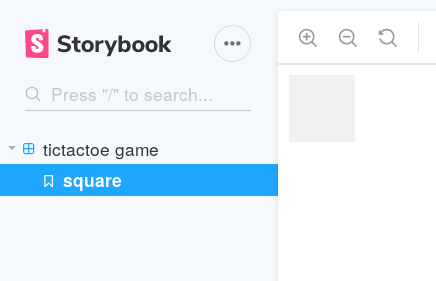

# Repassando o valor do quadradro

Nosso componente precisa de desenhar um 'X' ou 'O' toda vez que um valor for a ele atribuído. A forma mais simples é através de uma _prop_ que vamos chamar de _value_. No arquivo _Square.stories.js_ você já pode adiantar a passagem desse valor:
```javascript
import React from 'react';
import { Square } from '../Square';

export default {
  title: 'Components/Square',
  component: Square,
}

export const Primary = () => <Square width='50' height='50' value='O'/>;
```

# Desenhando o valor do quadrado

Em que situações o componete _Square_ deve ser (re)desenhado? A resposta está relacionada a _prop value_, quando essa for alterada, o desenho do quadrado deverá ser atualizado. No React, isso é chamado de 'efeito colateral' ou simplesmente 'efeito' do componente, que consiste em um evento de atualização visual do DOM quando houver alguma alteração de dados. Para tratar efeitos, o hook de efeito [useEffect](https://pt-br.reactjs.org/docs/hooks-effect.html) é utilizado. Atualize o código-fonte do componente Square:

Código completo do componente _Square_:

```javascript
import React, { useEffect, useRef } from 'react'

export function Square(props) { 
  
  const canvasRef = useRef()

  useEffect(() => {
    const ctx = canvasRef.current.getContext('2d')
    ctx.font = '25px arial'
    if ( props.value === 'X' ) {
      ctx.fillText('X', 15, 30)
    }
    else if ( props.value === 'O' ) {
      ctx.fillText('O', 15, 30)
    }  
  }, [props.value])

  return(
    <canvas
      ref={canvasRef}
      height={props.height}
      width={props.width}
      style={{backgroundColor: '#f1f1f1'}}
    />
  )
}

export default Square
```

# Detalhes sobre o _useEffect_

O _useEffect_ possui a seguinte sintaxe:

```javascript
useEffect(
    funcao_de_callback,
    [var1, var2, ..., varN]
)
```
Onde:
* __funcao_de_callback__: será executada toda vez que uma das variáveis for alterada. No nosso caso, utilizamos uma _arrow function_. 
* __[var1, var2, ..., varN]__: vetor de variáveis monitoradas, qualquer alteração em uma delas dispara a _funçao_de_callback_. No nosso caso, somente a variável _props.value_ é monitorada. 

As funções do tipo [hook tem algumas regras](https://pt-br.reactjs.org/docs/hooks-rules.html) que são obrigatórias:
* __Devem ser utilizadas somente no nível superior__: não podem rodar dentro de loops ou 'ifs', ou aninhadas dentro de outras funções.
* __Devem ser definidos somente dentro de componentes React ou em [hooks customizados](https://pt-br.reactjs.org/docs/hooks-rules.html)__.

# Detalhes sobre o _useRef_

O _useRef_ é um hook que permite gerar uma referência a um componente:

```javascript
  const canvasRef = useRef()
```

A constante _canvasRef_ foi depois utilizada na _prop ref_ do componente _canvas_:
```
    <canvas>
      ref={canvasRef}
      ...
    </canvas>
```

Com isso, pode-se obter o [Contexto 2D](https://developer.mozilla.org/en-US/docs/Web/API/CanvasRenderingContext2D) através da referência

```javascript
   useEffect(() => {
       ...
       const ctx = canvasRef.current.getContext('2d')
       ...
   }, [props.value])
```


Por meio do contexto 2D é possível alterar fonte (_ctx.font_) e desenhar um texto (ctx.fillText).

# Testando o componente _Square_:

O componente _Square_ agora renderiza um 'o':

![square-with-mark.png](square-with-mark.png)

Experimente alterar o valor da _prop.value_ para testar o 'X'.

#  Desenvolvimento do _Board_ (tabuleiro)

Vamos agora criar o arquivo _Board.js_ que através da composição de vários _Squares_ (quadrados) formar um tabuleiro de Jogo da Velha. Crie esse arquivo na pasta _src_, com o seguinte código inicial:

```javascript
import React from 'react'
import { Square } from './Square'

export function Board(props) {
  const renderSquare = (i) => <Square 
        value={props.squares[i]}
        width='50'
        height='50'
        id={i}
      />;
  return(
    <div>
        <div>
          {renderSquare(0)}
          {renderSquare(1)}
          {renderSquare(2)}
        </div>
        <div>
          {renderSquare(3)}
          {renderSquare(4)}
          {renderSquare(5)}
        </div>
        <div>
          {renderSquare(6)}
          {renderSquare(7)}
          {renderSquare(8)}
        </div>      
    </div>
  )
}

export default Board;
```

# Explicando o componente _Board_ 

Em React é comum criar funções geradoras de componentes:
```javascript
  const renderSquare = (i) => <Square 
        value={props.squares[i]}
        width='50'
        height='50'
        id={i}
      />;
```
A função _renderSquare_ recebe um parâmetro 'i' e retorna um componente _Square_, com o valor do quadrado (null, 'x' ou 'o') através de _props_. A _array squares_ será obrigatória e fornecida como propriedade _props_ do componente _Board_. Cada componente _Square_ receberá uma _prop id_ com o valor da sua posição, que vai de 0 a 8. O componente _Board_ é formado por um componente _div_ raiz que possui 3 componentes _div_ que formarão as linhas, sendo que cada linha possui 3 componentes _Square_, renderizados através da função _renderSquare_. Assim formaremos um tabuleiro de 3x3 quadrados do jogo da velha.

```html
   ...
   <div> <!-- componente raiz -->
       <div> <!-- primeira linha -->
           {renderSquare(0)}
           {renderSquare(1)}
           {renderSquare(2)}
       </div>
       <div>
       ... <!-- segunda linha -->
       </div>
       <div>
       ... <!-- terceira linha -->
       </div>
   </div>
   ...

```

# Testando o componente _Board_

Para visualizar o componente _Board_ é necessário adicionar uma história no _Storybook_, bem como inicializá-lo com uma _array_ preenchida com _nulls_ na prop _squares_:

```javascript
import React from 'react';
import { Board } from '../Board';

export default {
  title: 'Components/Board',
  component: Board,
}

export const Primary = () => 
  <Board       
    squares={[
      'x', null, 'o', 
      'o', 'x', null, 
      null, null, 'x'
    ]} 
/>;
```


# Visualização do componente _Board_:

![board-without-css.png](board-without-css.png)

Note que as 3 linhas do tabuleiro apareceram, mas os quadrados de cada linha ficaram colados um com o outro, sem separação de colunas. Uma das possíveis soluções para esse problema é utilizar estilização de componentes, vamos reaproveitar o arquivo CSS do [tutorial oficial do React](https://codepen.io/gaearon/pen/ybbQJX?editors=0100) e salvá-lo em um arquivo _Game.css_:

Código-fonte do CSS:

```html
body {
  font: 14px "Century Gothic", Futura, sans-serif;
  margin: 20px;
}

ol, ul {
  padding-left: 30px;
}

.board-row:after {
  clear: both;
  content: "";
  display: table;
}

.status {
  margin-bottom: 10px;
}

.square {
  background: #fff;
  border: 1px solid #999;
  float: left;
  font-size: 24px;
  font-weight: bold;
  line-height: 34px;
  height: 34px;
  margin-right: -1px;
  margin-top: -1px;
  padding: 0;
  text-align: center;
  width: 34px;
}
```

# Estilização dos componentes

Para aplicar estilização nos componentes _Board_ e _Square_, é necessário importar o arquivo CSS no componente através da sentença _import_ e depois atribuir o nome da classe através da prop _className_:

Estilização do componente _Board_:
```html
// ... imports
import './Game.css'

// utilizando a classe em cada div de linha
<div className="board-row">
    // renderiza quadrados
</div>
<div className="board-row">
    // renderiza quadrados
</div>
<div className="board-row">
    // renderiza quadrados
</div>
```

Estilização do componente _Square_:
```html
// ... imports
import './Game.css'

// utilizando a classe nas div's de linha
    <canvas
      className="square"
      // outras refs
      style={{backgroundColor: '#f1f1f1'}}
    />
```

# Componentes estilizados com CSS

E assim ficou a aparência do componente _Board_:

![board-with-css.png](board-with-css.png)

# Tratando o evento de _click_

O componente _canvas_ é o único que suporta eventos de _click_. Podemos criar uma função _handleClick_ e referenciá-lo na props _onClick_.

```javascript
// ... no componente Square
const handleClick = () => {
    alert('click from Square of id: '+props.id)
}
// outras funções: useEffect...
// ... no componente canvas
return (
    <canvas
        onClick={handleClick}
        // ... outras props
    />
```



Ao clicar em qualquer um dos quadrados, irá aparecer uma janela de alerta:

![square-with-onclick.png](square-with-onclick.png)

Neste caso, eu cliquei na célula 4 (a mais central). Com isso concluímos a interface básica do Frontend, o código parcial desta etapa está disponível na [__release__ v.0.1.0](https://gitlab.com/sd-si-2020-1/tic-tac-toe-frontend-web/-/releases/v0.1.0).
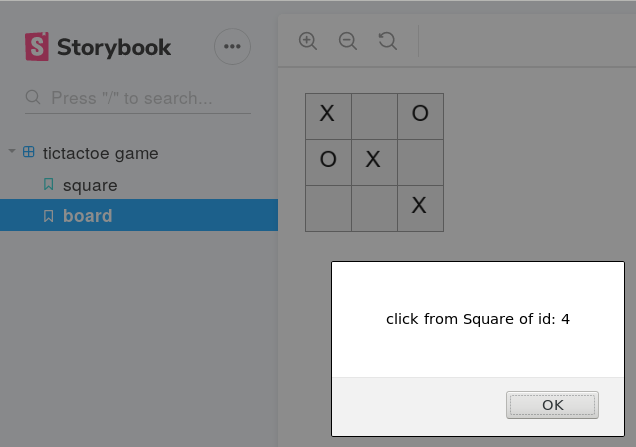

# Comunicação com o backend

Para se comunicar com o backend, é necessário utilizar alguma biblioteca cliente HTTP. Em Javascript há duas opções mais utilizadas:
* [Fetch](https://developer.mozilla.org/en-US/docs/Web/API/Fetch_API/Using_Fetch): é disponível nativamente no Javascript, inclusive na maioria dos navegadores. 
* [Axios](https://github.com/axios/axios): é necessário instalar, [tem mais funcionalidades que o _Fetch_](https://www.geeksforgeeks.org/difference-between-fetch-and-axios-js-for-making-http-requests/), tais como: suporte a progresso de download, cancelamento de requisição manualmente ou por tempo expirado, retorno de objetos diretamente para JSON, etc;

Neste tutorial, utilizaremos a biblioteca Axios para realizar a comunicação com a [API REST do backend](https://gitlab.com/sd-si-2020-1/tic-tac-toe-backend). Para instalar, execute o comando na raiz do projeto:

```
yarn add axios
```

Para testar, você deve primeiro iniciar o backend em um terminal (comando 'node app.js start') e depois em outro terminal realizar chamadas seguindo a seguinte sintaxe:

```javascript
axios.get(<url>).then(<f_response>).catch(<f_error>)                                         
```

Onde: 
* *url*: é o endereço HTTP da chamada GET
* *f_response*: função que trata a resposta em caso de sucesso
* *f_error*: função que trata o erro
Exemplos:
    
```javascript
// carrega a biblioteca axios
const axios = require('axios')
    
// consulta o tabuleiro, atribuindo o resultado a board
axios.get('http://localhost:8080/tictactoe/board')
    .then((response)=>{board=response.data})
    .catch((error)=>{console.log(error.response.data)})
    
// realiza o movimento na posição 0
axios.get('http://localhost:8080/tictactoe/move/0')
    .then((response)=>{board=response.data})
    .catch((error)=>{console.log(error.response.data)})    
```
![axios-test.gif](axios-test.gif)    
    

# Comunicação com o backend: obtendo valores dos quadrados

O primeiro passo para comunicação com o backend é renderizar o tabuleiro. No entanto, o componente _Board_ já obtém os valores dos quadrados através de _props_. Podemos então manter essa funcionalidade, testando com um [_if_ ternário](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Operators/Conditional_Operator) se esses valores estão sendo passados via _props_ ou não:

```javascript
  const initial_squares = 
    props.squares ? props.squares : 
    [null,null,null, null, null, null,null,null,null];
```

Na linha de código acima, nossos valores dos quadrados são inicializados via _props_, caso seja diferente de _null_, ou uma array de nulos. A variável _initial_squares_ pode ser utilizada depois para inicializar uma varíavel de estado _squares_, modificável através de uma função _setSquares_. Podemos fazer isso através da [função hook _setState_ ](https://reactjs.org/docs/hooks-state.html):

```javascript
  const [squares,setSquares] = useState(initial_squares)
```

Podemos então utilizar a variável de estado _squares_ na função _renderSquare_:

```javascript
  const renderSquare = (i) => {
    return <Square
        // value={props.squares[i]}
        value={squares[i]}
        // outros parâmetros
      />;
  }
```

Agora só falta obter os valores dos quadrados através de consultas ao _backend_ por meio do _axios_. Isso pode ser feito através do função [_hook useEffect_](https://reactjs.org/docs/hooks-effect.html), que é acionada uma vez na montagem do componente _Board_, para sinalizar isso, você pode utilizar [uma array vazia '[]' como segundo argumento do _useEffect_](https://stackoverflow.com/questions/53120972/how-to-call-loading-function-with-react-useeffect-only-once):

```javascript
  useEffect(()=>{
    if (props.squares) return; // exit if props.squares is not null
    let req1 = axios.get('http://localhost:8080/tictactoe/board');
    let req2 = axios.get('http://localhost:8080/tictactoe/status/all')
    Promise.all([req1, req2])    
      .then((results)=>{
          setSquares(results[0].data)
          // setStatus(results[1].data) // status modifier: not implemented yet
      })
      .catch((error)=>console.log(error))
  },[])
```

Neste exemplo, vamos aproveitar para incluir também duas chamadas via _axios_, uma para obter os dados do tabuleiro e outra para obter o status do jogo. Para realizar uma lista de chamadas de uma vez só, pode-se utilizar o [método _all_ da classe _Promise_ do Javascript](https://stackoverflow.com/questions/52669596/promise-all-with-axios). 

Para testar as alterações no componente _Board_ é necessário adicionar uma nova linha no final do arquivo _Board.stories.js_:

```javascript
export const WithAxios = () => <Board />;
```

Assim é a visualização do componente no Storybook:

![axios-test1.gif](axios-test1.gif)    

Note que como a interface ainda não submete jogadas, isso pode ser feito em linha de comando através do curl. 

# Comunicação com o backend: refatorando o componente Board

Primeiro, vamos refatorar o código do componente Board. Os [endpoints](https://www.smashingmagazine.com/2018/01/understanding-using-rest-api/) estão diretamente definidos no código-fonte ([hardcoded](https://pt.wikipedia.org/wiki/Codifica%C3%A7%C3%A3o_r%C3%ADgida)) e isso é ruim. Para resolver isso, o componente _Board_ pode montar _endpoints_ para consulta dos dados do tabuleiro e do status do jogo através da combinação das _props_ _base_url_, _move_route_, _board_route_ e _status_route_. Vamos modificar primeiro o componente _Board_:

```javascript
// ... imports
export function Board(props) {
  // obtem constantes pela desconstrução das props
  const { 
    base_url, 
    move_route,
    board_route,
    status_route} = props;
  // ...
  useEffect(()=>{
    if (props.squares) return; // exit if props.squares is not null
    // let req1 = axios.get('http://localhost:8080/tictactoe/board');
    let req1 = axios.get(base_url+board_route);      
    // let req2 = axios.get('http://localhost:8080/tictactoe/status');
    let req2 = axios.get(base_url+status_route);
    // ...
  },[])

```

Em seguida, o componente pode ser testado através da passagem de valores de _props_ no arquivo de história _Board.stories.js_:

```javascript
// export const WithAxios = () => <Board />;
export const WithAxios = () => 
  <Board
    base_url='http://localhost:8080/'
    board_route='tictactoe/board'
    move_route='tictactoe/move/'
    status_route='tictactoe/status/all'  
/>;
```

# Comunicação com o backend: obtendo status do jogo

No jogo da velha, cada jogador reveza sua vez de forma alternada. Geralmente o jogador identificado como 'X' é o primeiro a jogar e o jogador 'O' joga em sequência, assim alternadamente até acabar. Componentes podem armazenar dados em variáveis e assim controlar o seu estado (_state_). No nosso caso, o componente _Board_ é que terá os estados _next_ (que conterá o jogador da vez) e _status_ (que armazena o status geral do jogo). Para definir as variáveis do estado do componente podemos usar o _hook_ _setState_ para isso. 

Os dados que podemos obter do _backend_ são: _status_ (jogo aberto ou fechado), _winner_ (qual jogador venceu) e _next_ (próxima vez de jogador). Cada um destes dados possuem um _endpoint_ (URL) específico e assim pode ter uma chamada específica pelo _axios_. No entanto, para fins didáticos, vamos implementar uma variável de status geral, que engloba não somente o status do jogo, mas também o estados _winner_ e o _next_. Algumas modificações no backend devem ser realizadas:

```javascript
// arquivo rest/tictactoe.js

// ...
function status_all(req, res, next) { 
  const { status, winner } = tictactoe;
  res.send({status, winner, next: tictactoe.next })
  next();
}
// ...
/**
 * @swagger
 *
 * /tictactoe/status/all:
 *   get:
 *     description: returns the game status, next player and winner
 *     tags:
 *       - Tictactoe
 *     produces:
 *       - application/json
 *     responses:
 *       200:
 *         description: current game status, next player and winner
 */
server.get('/tictactoe/status/all', status_all);
// ...
```

Estados baseados em objetos exigem uma inicialização de suas propriedades e a forma mais simples de fazer isso é através do _hook setState_ do componente _Board_. 

```javascript
  // Board.js
  const initial_status = {
    status: '',
    winner: null,
    next: ''
  };
  const [status, setStatus] = useState(initial_status);
  // ...
  const initial_status = {
    status: '',
    winner: null,
    next: ''
  };
  const [status, setStatus] = useState(initial_status);
  // ...
  useEffect(()=>{
    // ...
    let req2 = axios.get(base_url+status_route)
    Promise.all([req1, req2])    
      .then((results)=>{
          setSquares(results[0].data)
          setStatus(results[1].data)  // descomentar a linha
      })
      .catch((error)=>console.log(error))
  },[])
```

# Comunicação com o backend: atualizando o cabeçalho e header do tabuleiro

Podemos obter do estado geral _status_ qual é o próximo a jogar, o status do jogo e o vencedor, mas precisamos de alguma forma apresentar essas informações quando o estado do _status_ geral mudar. Podemos acrescentar e controlar duas variáveis de estado: _header_ e _footer. Para capturar um efeito, pode-se usar o _hook useEffect_, que executa uma função quando a variável de estado _status alterar:

```javascript
  //...
  // variáveis de estado: header e footer
  const [header, setHeader] = useState('');
  const [footer, setFooter] = useState('');
  //...
  useEffect(()=>{ // essa função será executada quando o status for alterado
    setHeader('Game: '+status.status)
    if (status.status == 'opened')
      setFooter('Next player: '+status.next)
    else if (status.winner == null)
      setFooter('Result: game tied')
    else
      setFooter('Result: '+status.winner+' won')
  },[status]);  // nessa array, podemos incluir uma lista de estados a serem 'monitorados'
  //...
  return(
    
    <div>
        <div>{header}</div>      
        <div className="board-row">
          {renderSquare(0)}
          {renderSquare(1)}
          {renderSquare(2)}
        </div>
        <!-- outras divs -->
        <div>{footer}</div>            
    </div>
  )
```

Com isso podemos apresentar o status geral do jogo no cabeçalho e o rodapé do componente:

![board_status](board_status.png)    


# Comunicação com o backend: realizando um movimento

Para realizar um movimento no tabuleiro, devemos propagar o evento de clique que ocorre no componente _Square_, passando seu identificador _id_ para o componente _Board_, que por sua vez pode fazer chamadas REST na API do backend. 

Uma das soluções é passar a função de tratamento de clique via parâmetro props (_onClick_) do componente pai (_Board_) para o componente filho (_Quadrado_). Assim o componente filho pode repassar seu próprio _id_ para o componente pai realizar as ações necessárias:

```javascript
  // arquivo _Square.js_
  
  // o tratamento do evento não será mais realizado pelo filho 
  /* const handleClick = () => {
    alert('click from Square of id: '+props.id)
  }*/
   
  return(
    <canvas      
      // onClick={handleClick}
      /* o tratamento será realizado pela função fornecida pelo pai 
         através do parâmetro onClick via props. 
         O id fornecido também pelo pai será devolvido ao pai, 
         quando ocorrer o evento onClick no canvas
      */
      onClick={()=>{props.onClick(props.id)}}
      className="square"
      // outras props...
    />
```

Assim o componente _Board_ pode tratar o evento através de uma função (_handleClick_) e repassá-la esta função para o componente filho _Square_:

```javascript
// arquivo Board.js
function Board(props) {
  // ...
  const handleClick = (id) => {
    // faz a chamada API rest, repassando o id
    axios.get(base_url+move_route+id)
      .then((result)=> setSquares(result.data))
      .then(
        // obtém o novo status do jogo
        axios.get(base_url+status_route)
        .then((result)=>setStatus(result.data))
      )
      .catch((error)=>{
        console.log(JSON.stringify(error))
      })
  }
  // ...
  const renderSquare = (i) => <Square
        // ... outras props
        // repassa a função handleClick para o componente filho
        onClick={handleClick}
  />;
```

Com isto, a interação _frontend_ com o objeto _tictactoe_ do _backend_ foi concluída. Testes de interação podem ser realizadas no _Storybook_:

![tictactoe-test.gif](tictactoe-test.gif)

# Distribuindo a aplicação (deploy)

Para criar um modelo (template) de aplicação React, utilizamos a ferramenta _create-react-app_. Essa ferramenta cria vários arquivos modelo:
* __App.js__: aplicação modelo, disponível na pasta _src_. É através deste arquivo é que você definirá o(s) componente(s) padrões.
* __index.html__: arquivo modelo HTML, disponível na pasta _public_. É este arquivo que possui uma 'div' identificada como _root_ que servirá de componente raiz para montar dinamicamente os componentes raiz.

Tem outros arquivos extras na pasta _public_ como _logo192.png_, _logo512.png_, favicon.ico, manifest.json e robots.txt que [podem ser removidos ou alterados](https://hackernoon.com/create-react-app-is-way-too-bloated-5db07c3511), afim de criar um distribuição mais enxuta.

Para distribuir uma aplicação, você pode copiar uma das histórias do Storybook e alterar o arquivo _App.js_:
```javascript
import React from 'react';
import Board from './Board';

function App() {
  return (
    <Board
      base_url='http://localhost:8080/'
      board_route='tictactoe/board'
      move_route='tictactoe/move/'
      status_route='tictactoe/status/all'  
    />  
  );
}
export default App;
```

Para construir (build) a aplicação, execute:

```
yarn build
```

Observação: nesta fase de construição (build), o _yarn_ empacota todas bibliotecas dependentes para distribuição para produção. Nessa fase é muito comum ocorrerem falhas por conta de conflitos de versões entre bibliotecas. A correção desses conflitos é muito específica e pode ser corrigida manualmente alterando-se as listas de dependências (desenvolvimento e produção) contidas no arquivo _package.json_. Para aplicações mais complexas, esse correção é trabalhosa e demanda tempo e experiência. No nosso caso, para uma aplicação simples, os riscos de incompatibilidade são mínimas e podemos [desativar a checkagem chamada de _PREFLIGHT_ (pré-vôo)](https://github.com/facebook/create-react-app/issues/5972), criando um arquivo .env com o seguinte comando na raiz do projeto:

```bash
echo "SKIP_PREFLIGHT_CHECK=true" > .env
```

Depois disso, sua aplicação vai estar disponível na pasta _build_ do seu projeto. Se você já quiser testar a aplicação através de _nodejs_, você pode instalar e utilizar o pacote _serve_, através dos seguintes comandos:

```bash
# a opção --dev adiciona nas dependências de desenvolvimento no package.json
yarn add serve --dev
npx yarn serve build
```
![serve-build.png](serve-build.png)

Assim você pode abrir a aplicação pronta para produção no navegador:

![app-tictactoe.png](app-tictactoe.png)

# Considerações finais

Com isso finalizamos o desenvolvimento completo passo-a-passo de um _frontend_ _React_ para consumir uma API backend de um objeto _tictactoe_. A próxima etapa é o desenvolvimento de um _frontend_ para consumir o backend _game_, que é uma a API para jogo multiusuário, ou seja, dois jogadores independentes isolados e remotos jogando jogo-da-velha. 

# Exercícios

## 1. Nível fácil: 

1.1. Crie novas histórias para os componentes _Square_ e _Board_, fornecendo valores diferentes para os parâmetros passados via _props_.

1.2. Desenvolva uma nova implamentação de _Square_, utilizando o componente _button_ ao invés do _canvas_. Analise quais são as desvantagens e desvantagens. 


## 2. Nível médio: 

2.1. Altere a implementação do _Square_ para utilizar uma imagem que representa cada jogador em vez dos tradicionais 'X' e 'O'. 

2.2. Adicione um botão no componente _Board_ que que reinicializa o estado do objeto _tictactoe_.

2.3. Crie um diagrama de sequência que modele detalhadamente a comunicação entre componentes _Board_, _Square_ e o _Backend_, dos seguintes casos de uso: 
* a) A carga de um objeto _tictactoe_ zerado no frontend; 
* b) Uma jogada bem sucedida entre os componentes;

# 3. Nível difícil:

3.1. Crie um [jogo de memória](https://rachacuca.com.br/passatempos/jogo-da-memoria/) que consiste em achar pares de imagens iguais em um conjunto de cartas com a frente virada, sendo que é permitido virar no máximo duas cartaz por vez.

